In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\surya\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Exploratory Data Analysis

In [3]:
data = pd.read_csv('full_airline_review.csv')

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
data.head()

,rating,header,content,airline,recommended
0,3,food were served last,From Kochi to Singapore and vice verse we t...,singapore-airlines,no
1,5,"seat spacing is less""","The flight went from Terminal 1, the termin...",singapore-airlines,no
2,10,service was efficient and friendly,SQ894 is the afternoon flight to HKG operate...,singapore-airlines,yes
3,1,“Very disappointed”,Very disappointed with Singapore Airlines. Da...,singapore-airlines,no
4,1,incompetent customer service,I was flying business class from BCN to MLE ...,singapore-airlines,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       15386 non-null  int64 
 1   header       15386 non-null  object
 2   content      15386 non-null  object
 3   airline      15386 non-null  object
 4   recommended  15386 non-null  object
dtypes: int64(1), object(4)
memory usage: 601.1+ KB


In [7]:
data.recommended.value_counts()

recommended
yes    8284
no     7102
Name: count, dtype: int64

In [8]:
# Cleaning Open ended closers
data.header = data.header.str.strip('\"”“ ')

In [9]:
data.head()

,rating,header,content,airline,recommended
0,3,food were served last,From Kochi to Singapore and vice verse we t...,singapore-airlines,no
1,5,seat spacing is less,"The flight went from Terminal 1, the termin...",singapore-airlines,no
2,10,service was efficient and friendly,SQ894 is the afternoon flight to HKG operate...,singapore-airlines,yes
3,1,Very disappointed,Very disappointed with Singapore Airlines. Da...,singapore-airlines,no
4,1,incompetent customer service,I was flying business class from BCN to MLE ...,singapore-airlines,no


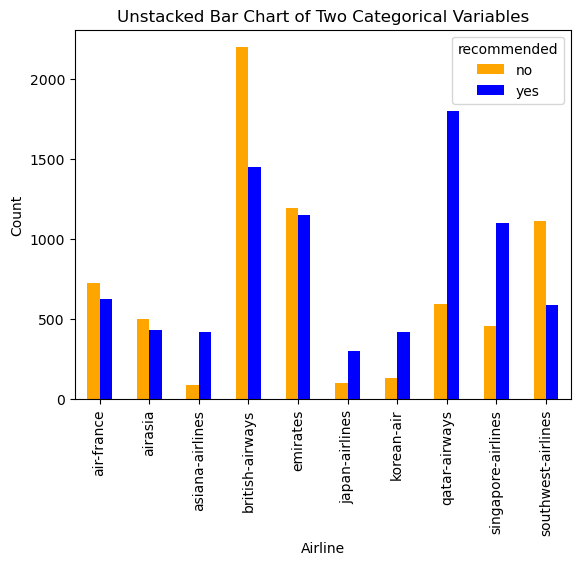

In [10]:
fig, ax = plt.subplots()
grouped = data.groupby(['airline','recommended'])["content"].count()
colors = {'yes': 'blue', 'no': 'orange'}
grouped.unstack().plot(kind='bar', stacked=False, color=[colors[col] for col in grouped.unstack().columns], ax=ax)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Unstacked Bar Chart of Two Categorical Variables')
plt.legend(title='recommended')
plt.show()

### Preprocessing

In [11]:
# Remove Stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_stopwords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
data.content = data.content.apply(clean_stopwords)

In [13]:
#Lower case
data.content = data.content.apply(lambda x: x.lower())

In [14]:
#Lemmatisation
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemmatize_words(text):
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text
data.content = data.content.apply(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Splitting and Feature extraction

In [16]:
from sklearn.model_selection import train_test_split
X = data['content']
y = data['recommended'].apply(lambda x : 1 if x=='yes' else -1)

In [17]:
## Bag of Words Vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(X)
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bag_of_words_df.shape

(15386, 23720)

In [18]:
# Tf-IDF Vecorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.shape

(15386, 23720)

In [19]:
# Glove Vectorization
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_md") 
def get_glove_vectors(text):
    doc = nlp(text)
    return doc.vector

gloved_vec = X.apply(get_glove_vectors)
gloved_vec.shape

(15386,)

### Modeling:

#### Packages required

In [20]:
!pip install keras
!pip install transformers
!pip install tensorflow

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers  import Dense, Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from transformers import BertTokenizer, TFBertModel, TFBertForSequenceClassification

RuntimeError: Failed to import transformers.models.bert.modeling_tf_bert because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

#### Baseline Model : Lexicon based Sentiment Analysis

In [ ]:
# VADER Lexicon based model
nltk.download('vader_lexicon')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
sid = SentimentIntensityAnalyzer()
y_pred = X_train.apply(sid.polarity_scores)
y_pred = y_pred.apply(lambda x: x['compound'])
print("ACCURACY SCORE (VADER): ",accuracy_score(y_train,y_pred.apply(lambda x: 1 if x>0 else -1)))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ACCURACY SCORE (VADER):  0.7358628534286643
